In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('D:\\Machine Learning\\Datasets\\EmoContext\\train.txt',
                        sep='\t', index_col='id')
            

In [5]:
train_data.head()

,turn1,turn2,turn3,label
id,,,,
0,Don't worry I'm girl,hmm how do I know if you are,What's ur name?,others
1,When did I?,saw many times i think -_-,No. I never saw you,angry
2,By,by Google Chrome,Where you live,others
3,U r ridiculous,I might be ridiculous but I am telling the truth.,U little disgusting whore,angry
4,Just for time pass,wt do u do 4 a living then,Maybe,others


In [34]:
train_data.shape

(30160, 4)

In [35]:
train_data.isnull().sum()

turn1    0
turn2    0
turn3    0
label    0
dtype: int64

In [38]:
train_data.label.unique()

array(['others', 'angry', 'sad', 'happy'], dtype=object)

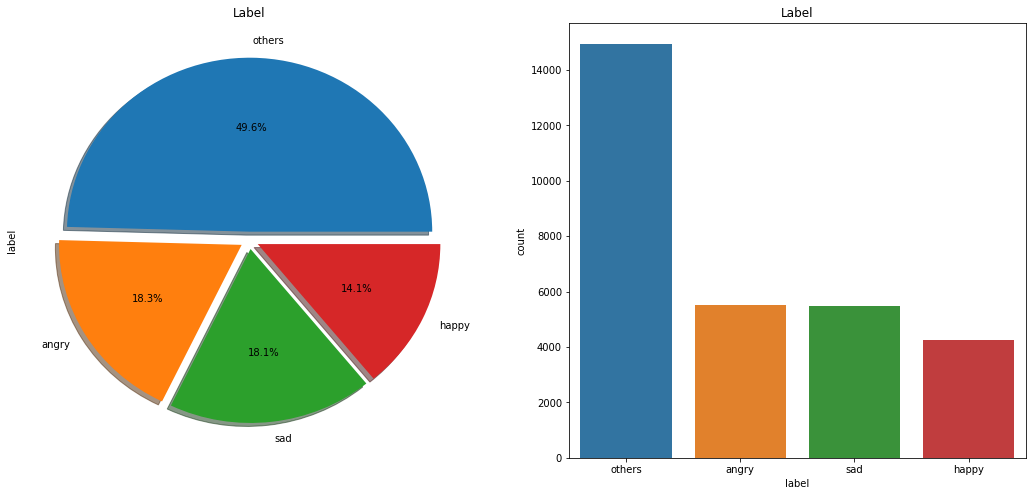

In [46]:
f , ax = plt.subplots(1,2, figsize=(18, 8))
train_data.label.value_counts().plot.pie(explode=[0.05, 0.05, 0.05, 0.05],
                                        autopct='%1.1f%%', shadow=True,
                                        ax=ax[0])
sns.countplot('label', data=train_data, ax=ax[1])
ax[0].set_title('Label')
ax[1].set_title('Label')
plt.show()

# Baseline model with Tf-idf and Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [8]:
word_vectorizer = TfidfVectorizer(
            sublinear_tf=True,
            strip_accents='unicode',
            analyzer='word',
            token_pattern=r'\w{1,}',
            stop_words='english',
            ngram_range=(1, 1),
            max_features=10000)


In [7]:
word_vectorizer = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')


In [11]:
full_conv = train_data[['turn1', 'turn2', 'turn3']].apply(lambda x: ' '.join(x), axis=1)
word_vectorizer.fit(full_conv)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=1,
        stop_words='english', strip_accents='unicode', sublinear_tf=1,
        token_pattern='\\w{1,}', tokenizer=None, use_idf=1,
        vocabulary=None)

In [12]:
full_conv_vect = word_vectorizer.transform(full_conv)

In [13]:
log_reg = LogisticRegression(C=1.0)

In [ ]:
def scorer(estimator, X, y):
    

In [14]:
cv_score = np.mean(cross_val_score(log_reg,
                                   full_conv_vect,
                                   train_data.label,
                                   cv=5, scoring='f1_micro'))
cv_score

C:\Users\Simeon\Anaconda3\envs\First\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Simeon\Anaconda3\envs\First\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7592513756845208

cv f1_micro - 0.7592513756845208

# Trying baseline with Randomforest and SVM

In [15]:
cv_score = np.mean(cross_val_score(RandomForestClassifier(),
                                   full_conv_vect,
                                   train_data.label,
                                   cv=5, scoring='f1_micro'))
cv_score

C:\Users\Simeon\Anaconda3\envs\First\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Simeon\Anaconda3\envs\First\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Simeon\Anaconda3\envs\First\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Simeon\Anaconda3\envs\First\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Simeon\Anaconda3\en

0.7493034193619368

In [16]:
cv_score = np.mean(cross_val_score(SVC(),
                                   full_conv_vect,
                                   train_data.label,
                                   cv=5, scoring='f1_micro'))
cv_score

C:\Users\Simeon\Anaconda3\envs\First\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KeyboardInterrupt: 

In [17]:
import lightgbm
from sklearn.model_selection import train_test_split 

In [18]:
train_x, val_x, train_y, val_y = train_test_split(full_conv_vect,
                                                  train_data.label,
                                                 test_size=0.2,
                                                 random_state=42)

In [19]:
clf = lightgbm.LGBMClassifier()
clf.fit(train_x, train_y)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [20]:
val_pred = clf.predict(val_x)
f1_score(y_true=val_y, y_pred=val_pred,average='micro' )

0.778183023872679

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
cv_score = np.mean(cross_val_score(MultinomialNB(),
                                   full_conv_vect,
                                   train_data.label,
                                   cv=5, scoring='f1_micro'))
cv_score

0.6881631774078217

In [ ]:
ctv = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), stop_words = 'english')

Result from basic models with Tfidf vectoriztion (1 grams)
SVM - CV F1-Micro - 0.49
RandomForest - CV F1-Micro - 0.7493
LightGBM - V F1-Micro - 0.77818
MultinomialNB - CV F1-Micro - 0.6881
Logistic Regression - CV -  0.75925

# EDA 

In [21]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Try Dev Submit 

In [23]:
dev = pd.read_csv('D:\\Machine Learning\\Datasets\\EmoContext\\devwithoutlabels.txt',
                        sep='\t', index_col='id')

In [31]:
dev.head() 

,turn1,turn2,turn3
id,,,
0,Then dont ask me,YOURE A GUY NOT AS IF YOU WOULD UNDERSTAND,IM NOT A GUY FUCK OFF
1,Mixed things such as??,the things you do.,Have you seen minions??
2,Today I'm very happy,and I'm happy for you ❤,I will be marry
3,Woah bring me some,left it there oops,Brb
4,it is thooooo,I said soon master.,he is pressuring me


In [25]:
full_dev_conv = dev[['turn1', 'turn2', 'turn3']].apply(lambda x: ' '.join(x), axis=1)

In [26]:
dev_vecto = word_vectorizer.transform(full_dev_conv)

In [27]:
dev_vecto.shape

(2755, 14098)

In [29]:
#lclf = lightgbm.LGBMClassifier()
lclf = LogisticRegression(C=1.0)
lclf.fit(full_conv_vect, train_data.label)

C:\Users\Simeon\Anaconda3\envs\First\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Simeon\Anaconda3\envs\First\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
dev_labels = lclf.predict(dev_vecto)
dev_labels

array(['angry', 'others', 'happy', ..., 'others', 'others', 'others'],
      dtype=object)

In [31]:
dev_labels.shape

(2755,)

In [32]:
dev_lb = pd.DataFrame(dev_labels)
dev_lb.columns = ['Label']
dev_lb

,Label
0,angry
1,others
2,happy
3,others
4,others
5,others
6,angry
7,others
8,others
9,others


In [33]:
dev_lb.shape

(2755, 1)

In [34]:
submission = pd.concat([dev, dev_lb], axis=1)
submission

,turn1,turn2,turn3,Label
id,,,,
0,Then dont ask me,YOURE A GUY NOT AS IF YOU WOULD UNDERSTAND,IM NOT A GUY FUCK OFF,angry
1,Mixed things such as??,the things you do.,Have you seen minions??,others
2,Today I'm very happy,and I'm happy for you ❤,I will be marry,happy
3,Woah bring me some,left it there oops,Brb,others
4,it is thooooo,I said soon master.,he is pressuring me,others
5,Wont u ask my age??,hey at least I age well!,Can u tell me how can we get closer??,others
6,I said yes,What if I told you I'm not?,Go to hell,angry
7,Where I ll check,why tomorrow?,No I want now,others
8,Shall we meet,you say- you're leaving soon...anywhere you wa...,?,others


In [56]:
submission.to_csv(r'D:\\Machine Learning\\Datasets\\EmoContext\\test.txt',
                  sep=' ', mode='a')

In [62]:
dev_labels[0]

'angry'

In [36]:
import io

In [37]:
solutionPath = 'D:\\Machine Learning\\Datasets\\EmoContext\\test.txt'
testDataPath = 'D:\\Machine Learning\\Datasets\\EmoContext\\devwithoutlabels.txt'
with io.open(solutionPath, "w", encoding="utf8") as fout:
        fout.write('\t'.join(["id", "turn1", "turn2", "turn3", "label"]) + '\n')        
        with io.open(testDataPath, encoding="utf8") as fin:
            fin.readline()
            for lineNum, line in enumerate(fin):
                fout.write('\t'.join(line.strip().split('\t')[:4]) + '\t')
                fout.write(dev_labels[lineNum] + '\n')